Вариант 28: 

Хачатрян Армен БПМ153

3.1.28 
$$ \text{Матрица размерности 5x5 }$$
$$ a_{i,j} = \frac{500}{(8c-5)^{2}}$$
$$ Ax=b $$

НАЧАЛО

In [ ]:
import numpy as np

Функция, которая решает СЛАУ методом Гаусса

In [ ]:
def gauss(A,b):
    # прямой ход
    for k in range(A.shape[0]-1):
        # число шагов метода = число строк - 1
        # фиксируем k-ую строку
        for i in range(k+1, A.shape[0]):
            # ходим по оставшимся строкам
            m = A[i][k]/A[k][k] # множитель k-ого шага
            for j in range(A.shape[1]):
                # преобразовываем строку i
                A[i][j] = A[i][j] - m*A[k][j]
            # преобразовываем правую часть строки i
            b[i] = b[i] - m*b[k] 
            
    # обратный ход
    X = np.zeros(A.shape[0]) # вектор из нулей 
    X[-1] = b[-1]/A[-1][-1] # инициализация последнего значения
    # все остальные значения
    for k in range(A.shape[0]-2,-1,-1):
        X[k] = (b[k] - sum(X[k+1:]*A[k][k+1:]))/A[k][k]
            
    return X 

Найдем С

In [ ]:
C = np.zeros((5,5),dtype=np.float)

for i in range(1,6):
    for j in range(1,6):
        C[i-1][j-1] = 0.1*28*i*j
C

array([[  2.8,   5.6,   8.4,  11.2,  14. ],
       [  5.6,  11.2,  16.8,  22.4,  28. ],
       [  8.4,  16.8,  25.2,  33.6,  42. ],
       [ 11.2,  22.4,  33.6,  44.8,  56. ],
       [ 14. ,  28. ,  42. ,  56. ,  70. ]])

Подставим полученное С в $a_{i,j}$

Получим матрицу А

In [ ]:
A = 500/((8*C-5)**2)
A

array([[  1.65147311e+00,   3.15648595e-01,   1.29237704e-01,
          6.98601121e-02,   4.36719364e-02],
       [  3.15648595e-01,   6.98601121e-02,   2.98608009e-02,
          1.64768316e-02,   1.04251371e-02],
       [  1.29237704e-01,   2.98608009e-02,   1.29360885e-02,
          7.18489494e-03,   4.56366773e-03],
       [  6.98601121e-02,   1.64768316e-02,   7.18489494e-03,
          4.00347309e-03,   2.54778368e-03],
       [  4.36719364e-02,   1.04251371e-02,   4.56366773e-03,
          2.54778368e-03,   1.62324487e-03]])

Вектор правой части b (Вариант = 28)

In [ ]:
b = np.zeros(5,dtype=np.float)
b = b+28
b

array([ 28.,  28.,  28.,  28.,  28.])

Решение с помощью написанной вручную функции

In [ ]:
gauss(A,b)

array([  1.05970533e+07,  -1.92512995e+09,   2.44723013e+10,
        -7.25452970e+10,   5.71406396e+10])

Решение с помощью библиотеки linalg

In [ ]:
X = np.linalg.solve(A, b)
X

array([  1.05970533e+07,  -1.92512995e+09,   2.44723013e+10,
        -7.25452970e+10,   5.71406396e+10])

Число обусловленности

In [ ]:
cond = np.linalg.cond(A,np.inf)
cond

46090728447.953392

Зададим функцию relative_error, с помощью которой получим вектор относительных погрешностей d
$$ d = (d_{1},...,d_{n})^{T} $$

$$ d_{i}=\frac{||x-x^{i}||_{\infty}}{||x||_{\infty}} \text{ , где i =1,...,n} $$

Получим затем новые компоненты векторов $b^{i}$, которые появляются из-за решений $x^{i}$ систем $Ax^{i}=b^{i}$, i =1,...,n

Они вычисляются по формулам:
$$ \begin{equation*}
    b^{i}_{k} = 
    \begin{cases}
    b_{k}+\Delta & k=i\\
    b_{k} & k \neq i
    \end{cases}
    \end{equation*}  \text{, где k = 1,...,n} $$
($\Delta$ - произвольная величина погрешности)

In [ ]:
def relative_error(A,b,delta):
    
    n = A.shape[0]
    d = np.zeros(n,dtype=np.float)
    X1 = gauss(A,b)
    
    for i in range(n): 
        b_i = np.zeros(n,dtype=np.float)
        
        for k in range(n):
            if i == k:
                b_i[k] = b[k]+delta
            else:
                b_i[k] = b[k]
                
        x_i = gauss(A,b_i)
        d[i] = np.linalg.norm(X1-x_i,np.inf)/np.linalg.norm(X1,np.inf)
        
    return d
        

In [ ]:
relative_error(A,b,0.01)

array([  8.34678570e-14,   1.44647560e-11,   4.72816405e-09,
         2.63703507e-06,   2.87233328e-03])

Новые компоненты вектора

In [ ]:
b

array([ 28.        ,  22.64831696,  13.54699888,   7.12881968,   3.48803497])

На основе вычисленного вектора d построить гистограмму

<Container object of 5 artists>

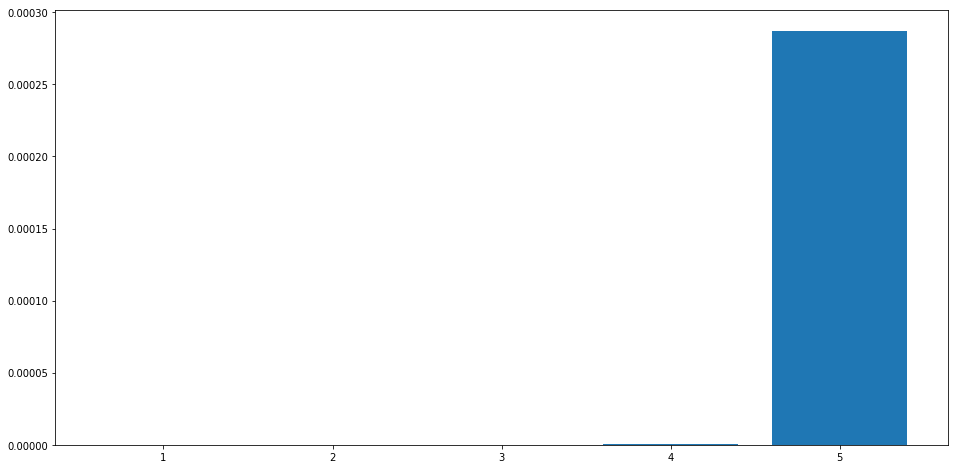

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,8))
plt.bar(np.arange(1,6), relative_error(A,b,0.001))

Получилось, что $b_{5}$ оказывает наибольшее вляиние на погрешность решения

In [ ]:
b = np.array([28,28,28,28,28])
b_5 = np.array([28,28,28,28,28.00001])
del_b_5=np.linalg.norm(b-b_5,np.inf)/np.linalg.norm(b,np.inf)
cond*del_b_5

16460.974445074466

Число обусловленности

In [ ]:
cond

46090728447.953392

In [ ]:
X

array([  1.05970533e+07,  -1.92512995e+09,   2.44723013e+10,
        -7.25452970e+10,   5.71406396e+10])

In [ ]:
d=relative_error(A,b,0.01)
d[4]

0.0003574710445737672

In [ ]:
b

array([28, 28, 28, 28, 28])

КОНЕЦ